# Example 1

In [162]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [163]:
data = {'ID':[1,2,3,4,5,6],
       'Onion':[1,0,0,1,1,1],
       'Potato':[1,1,0,1,1,1],
       'Burger':[1,1,0,0,1,1],
       'Milk':[0,1,1,1,0,1],
       'Beer':[0,0,1,0,1,0]}

In [164]:
df = pd.DataFrame(data)

In [165]:
df

,ID,Onion,Potato,Burger,Milk,Beer
0,1,1,1,1,0,0
1,2,0,1,1,1,0
2,3,0,0,0,1,1
3,4,1,1,0,1,0
4,5,1,1,1,0,1
5,6,1,1,1,1,0


In [166]:
frequent_itemsets = apriori(df[['Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]], min_support=0.50, use_colnames=True)        #les items achetés + de 50% des achats du df

c:\Users\alexk\AppData\Local\Programs\Python\Python314\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [167]:
frequent_itemsets

,support,itemsets
0,0.666667,(Onion)
1,0.833333,(Potato)
2,0.666667,(Burger)
3,0.666667,(Milk)
4,0.666667,"(Potato, Onion)"
5,0.500000,"(Burger, Onion)"
6,0.666667,"(Burger, Potato)"
7,0.500000,"(Milk, Potato)"
8,0.500000,"(Burger, Potato, Onion)"


In [168]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [169]:
rules   # Les règles ou le lift est suppérieur à 1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Potato),(Onion),0.833333,0.666667,0.666667,0.80,1.200,1.0,0.111111,1.666667,1.000000,0.8,0.40,0.90
1,(Onion),(Potato),0.666667,0.833333,0.666667,1.00,1.200,1.0,0.111111,inf,0.500000,0.8,1.00,0.90
2,(Burger),(Onion),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
3,(Onion),(Burger),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.00,1.200,1.0,0.111111,inf,0.500000,0.8,1.00,0.90
5,(Potato),(Burger),0.833333,0.666667,0.666667,0.80,1.200,1.0,0.111111,1.666667,1.000000,0.8,0.40,0.90
6,"(Burger, Potato)",(Onion),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
7,"(Burger, Onion)",(Potato),0.500000,0.833333,0.500000,1.00,1.200,1.0,0.083333,inf,0.333333,0.6,1.00,0.80
8,"(Potato, Onion)",(Burger),0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75
9,(Burger),"(Potato, Onion)",0.666667,0.666667,0.500000,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.6,0.25,0.75


In [170]:
rules [ (rules['lift'] >1.125)  & (rules['confidence']> 0.8)  ]             # Les règles ou le lift est suppérieur à 1.125 et la confidence à 0.8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Onion),(Potato),0.666667,0.833333,0.666667,1.0,1.2,1.0,0.111111,inf,0.500000,0.8,1.0,0.9
4,(Burger),(Potato),0.666667,0.833333,0.666667,1.0,1.2,1.0,0.111111,inf,0.500000,0.8,1.0,0.9
7,"(Burger, Onion)",(Potato),0.500000,0.833333,0.500000,1.0,1.2,1.0,0.083333,inf,0.333333,0.6,1.0,0.8


# Example 2


In [171]:
retail_shopping_basket = {'ID':[1,2,3,4,5,6],
                         'Basket':[['Beer', 'Diaper', 'Pretzels', 'Chips', 'Aspirin'],
                                   ['Diaper', 'Beer', 'Chips', 'Lotion', 'Juice', 'BabyFood', 'Milk'],
                                   ['Soda', 'Chips', 'Milk'],
                                   ['Soup', 'Beer', 'Diaper', 'Milk', 'IceCream'],
                                   ['Soda', 'Coffee', 'Milk', 'Bread'],
                                   ['Beer', 'Chips']
                                  ]
                         }

In [172]:
retail = pd.DataFrame(retail_shopping_basket)

In [173]:
pd.options.display.max_colwidth=100

In [174]:
retail

,ID,Basket
0,1,"[Beer, Diaper, Pretzels, Chips, Aspirin]"
1,2,"[Diaper, Beer, Chips, Lotion, Juice, BabyFood, Milk]"
2,3,"[Soda, Chips, Milk]"
3,4,"[Soup, Beer, Diaper, Milk, IceCream]"
4,5,"[Soda, Coffee, Milk, Bread]"
5,6,"[Beer, Chips]"


In [175]:
retail = retail.drop('Basket' ,axis=1).join(retail.Basket.str.join(',').str.get_dummies(','))                               # one-hot encode the basket, is the item bought in this ID ? true or false

In [176]:
retail

,ID,Aspirin,BabyFood,Beer,Bread,Chips,Coffee,Diaper,IceCream,Juice,Lotion,Milk,Pretzels,Soda,Soup
0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0
1,2,0,1,1,0,1,0,1,0,1,1,1,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,4,0,0,1,0,0,0,1,1,0,0,1,0,0,1
4,5,0,0,0,1,0,1,0,0,0,0,1,0,1,0
5,6,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [177]:
frequent_itemsets_2 = apriori(retail.drop('ID',axis=1), use_colnames=True)              # on regroupe les items dans une liste et on calcule le support

c:\Users\alexk\AppData\Local\Programs\Python\Python314\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [178]:
frequent_itemsets_2

,support,itemsets
0,0.666667,(Beer)
1,0.666667,(Chips)
2,0.500000,(Diaper)
3,0.666667,(Milk)
4,0.500000,"(Beer, Chips)"
5,0.500000,"(Beer, Diaper)"


In [179]:
association_rules(frequent_itemsets_2, metric='lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Beer),(Chips),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.60,0.25,0.750
1,(Chips),(Beer),0.666667,0.666667,0.5,0.75,1.125,1.0,0.055556,1.333333,0.333333,0.60,0.25,0.750
2,(Beer),(Diaper),0.666667,0.500000,0.5,0.75,1.500,1.0,0.166667,2.000000,1.000000,0.75,0.50,0.875
3,(Diaper),(Beer),0.500000,0.666667,0.5,1.00,1.500,1.0,0.166667,inf,0.666667,0.75,1.00,0.875


In [180]:
association_rules(frequent_itemsets_2)                          # the most associated itemset in this data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Diaper),(Beer),0.5,0.666667,0.5,1.0,1.5,1.0,0.166667,inf,0.666667,0.75,1.0,0.875


# Example 3

In [181]:
movies = pd.read_csv('dataset/ml-latest-small/movies.csv')

In [182]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [183]:
movies_ohe = movies.drop('genres',axis=1).join(movies.genres.str.get_dummies())                                      # Une nouvelle fois on transforme en one-hot encode. Is the movie from this genre ?

In [184]:
pd.options.display.max_columns=100

In [185]:
movies_ohe.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [186]:
stat1 = movies_ohe.drop(['title', 'movieId'],axis=1).apply(pd.value_counts)

C:\Users\alexk\AppData\Local\Temp\ipykernel_27444\1177173523.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  stat1 = movies_ohe.drop(['title', 'movieId'],axis=1).apply(pd.value_counts)


In [187]:
stat1 = stat1.transpose().drop(0,axis=1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'})         #Nombre de movies par genre, dans l'ordre decroissant

In [188]:
stat2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})

In [189]:
stat2 = stat2[stat2['genre_count']==1].drop('movieId',axis=1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)

In [190]:
stat = stat1.merge(stat2, how='left', left_index=True, right_index=True).fillna(0)

In [191]:
stat.genre_count=stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'},inplace=True)

In [192]:
stat.drop('title',axis=1)

,No. of movies,No. of movies with only 1 genre
Drama,4361,1053
Comedy,3756,946
Thriller,1894,84
Action,1828,60
Romance,1596,21
Adventure,1263,12
Crime,1199,12
Sci-Fi,980,37
Horror,978,167
Fantasy,779,4


Text(0.5, 1.0, 'distribution of number of genres')

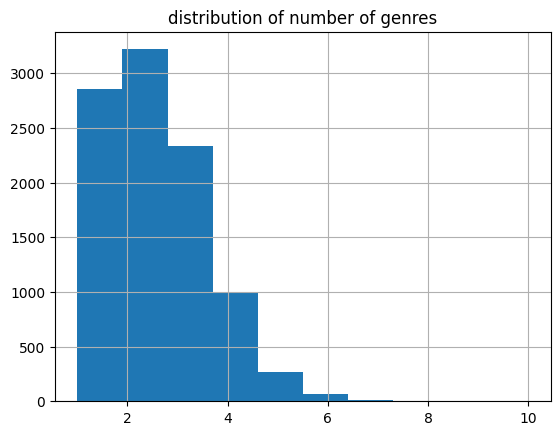

In [193]:
import matplotlib.pyplot as plt                                     # Plotting histogram
%matplotlib inline
movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()
plt.title('distribution of number of genres')

In [194]:
movies_ohe.set_index(['movieId','title'],inplace=True)

In [195]:
frequent_itemsets_movies = apriori(movies_ohe,use_colnames=True, min_support=0.025)

c:\Users\alexk\AppData\Local\Programs\Python\Python314\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [196]:
frequent_itemsets_movies                                                    # Les genres de films les plus fréquents dans le dataset

,support,itemsets
0,0.187641,(Action)
1,0.129645,(Adventure)
2,0.062718,(Animation)
3,0.068158,(Children)
4,0.385547,(Comedy)
5,0.123075,(Crime)
6,0.045165,(Documentary)
7,0.447649,(Drama)
8,0.079963,(Fantasy)
9,0.100390,(Horror)


In [197]:
rules_movies =  association_rules(frequent_itemsets_movies, metric='lift', min_threshold=1.25)

In [ ]:
rules_movies                                    # règles d'association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Adventure),(Action),0.129645,0.187641,0.062615,0.482977,2.573940,1.0,0.038289,1.571224,0.702576,0.245869,0.363553,0.408338
1,(Action),(Adventure),0.187641,0.129645,0.062615,0.333698,2.573940,1.0,0.038289,1.306247,0.752735,0.245869,0.234448,0.408338
2,(Crime),(Action),0.123075,0.187641,0.042907,0.348624,1.857929,1.0,0.019813,1.247142,0.526575,0.160215,0.198167,0.288645
3,(Action),(Crime),0.187641,0.123075,0.042907,0.228665,1.857929,1.0,0.019813,1.136892,0.568426,0.160215,0.120409,0.288645
4,(Sci-Fi),(Action),0.100595,0.187641,0.046294,0.460204,2.452576,1.0,0.027419,1.504937,0.658508,0.191345,0.335520,0.353461
5,(Action),(Sci-Fi),0.187641,0.100595,0.046294,0.246718,2.452576,1.0,0.027419,1.193981,0.729069,0.191345,0.162466,0.353461
6,(Thriller),(Action),0.194416,0.187641,0.067235,0.345829,1.843034,1.0,0.030754,1.241814,0.567807,0.213564,0.194726,0.352072
7,(Action),(Thriller),0.187641,0.194416,0.067235,0.358315,1.843034,1.0,0.030754,1.255420,0.563072,0.213564,0.203454,0.352072
8,(Adventure),(Animation),0.129645,0.062718,0.025354,0.195566,3.118175,1.0,0.017223,1.165145,0.780486,0.151813,0.141737,0.299911
9,(Animation),(Adventure),0.062718,0.129645,0.025354,0.404255,3.118175,1.0,0.017223,1.460953,0.724755,0.151813,0.315515,0.299911


As we can see in this dataset, the support and hence confidence values are fairly small. This makes it difficult interpreting the result based on these two values. Whereas, the lift and conviction remains to very intuitive and representative. That is why we should understand the meaning of all of the 5 metrics to accurately interpret the result!

In [199]:
rules_movies[(rules_movies.conviction>1.25)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Adventure),(Action),0.129645,0.187641,0.062615,0.482977,2.573940,1.0,0.038289,1.571224,0.702576,0.245869,0.363553,0.408338
1,(Action),(Adventure),0.187641,0.129645,0.062615,0.333698,2.573940,1.0,0.038289,1.306247,0.752735,0.245869,0.234448,0.408338
4,(Sci-Fi),(Action),0.100595,0.187641,0.046294,0.460204,2.452576,1.0,0.027419,1.504937,0.658508,0.191345,0.335520,0.353461
7,(Action),(Thriller),0.187641,0.194416,0.067235,0.358315,1.843034,1.0,0.030754,1.255420,0.563072,0.213564,0.203454,0.352072
9,(Animation),(Adventure),0.062718,0.129645,0.025354,0.404255,3.118175,1.0,0.017223,1.460953,0.724755,0.151813,0.315515,0.299911
11,(Children),(Adventure),0.068158,0.129645,0.032026,0.469880,3.624360,1.0,0.023190,1.641806,0.777052,0.193189,0.390915,0.358455
12,(Adventure),(Fantasy),0.129645,0.079963,0.034285,0.264450,3.307149,1.0,0.023918,1.250815,0.801540,0.195550,0.200521,0.346602
13,(Fantasy),(Adventure),0.079963,0.129645,0.034285,0.428755,3.307149,1.0,0.023918,1.523610,0.758257,0.195550,0.343664,0.346602
14,(Sci-Fi),(Adventure),0.100595,0.129645,0.031410,0.312245,2.408464,1.0,0.018369,1.265502,0.650205,0.157976,0.209799,0.277263
16,(Children),(Animation),0.068158,0.062718,0.031000,0.454819,7.251799,1.0,0.026725,1.719213,0.925161,0.310380,0.418339,0.474545


In [ ]:
rules_movies[(rules_movies.conviction>1.5)].sort_values(by=['lift','conviction'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
17,(Animation),(Children),0.062718,0.068158,0.031000,0.494272,7.251799,1.0,0.026725,1.842573,0.919791,0.310380,0.457281,0.474545
16,(Children),(Animation),0.068158,0.062718,0.031000,0.454819,7.251799,1.0,0.026725,1.719213,0.925161,0.310380,0.418339,0.474545
11,(Children),(Adventure),0.068158,0.129645,0.032026,0.469880,3.624360,1.0,0.023190,1.641806,0.777052,0.193189,0.390915,0.358455
13,(Fantasy),(Adventure),0.079963,0.129645,0.034285,0.428755,3.307149,1.0,0.023918,1.523610,0.758257,0.195550,0.343664,0.346602
31,(Mystery),(Thriller),0.058817,0.194416,0.036338,0.617801,3.177729,1.0,0.024902,2.107761,0.728137,0.167534,0.525563,0.402354
0,(Adventure),(Action),0.129645,0.187641,0.062615,0.482977,2.573940,1.0,0.038289,1.571224,0.702576,0.245869,0.363553,0.408338
36,"(Crime, Drama)",(Thriller),0.065387,0.194416,0.031718,0.485086,2.495096,1.0,0.019006,1.564503,0.641136,0.139064,0.360819,0.324117
4,(Sci-Fi),(Action),0.100595,0.187641,0.046294,0.460204,2.452576,1.0,0.027419,1.504937,0.658508,0.191345,0.335520,0.353461
22,(Crime),(Thriller),0.123075,0.194416,0.058407,0.474562,2.440963,1.0,0.034479,1.533167,0.673177,0.225436,0.347755,0.387492
29,(Horror),(Thriller),0.100390,0.194416,0.047116,0.469325,2.414026,1.0,0.027598,1.518037,0.651120,0.190220,0.341255,0.355835


In [201]:
pd.options.display.max_rows=50

In [ ]:
movies[(movies.genres.str.contains('Adventure')) & (movies.genres.str.contains('Children')) & (~movies.genres.str.contains('Animation'))]       # Les films de genre Aventure et Childre mais pas d'Animation

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
53,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
95,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical
109,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy
...,...,...,...
9428,166203,Sapphire Blue (2014),Adventure|Children|Fantasy|Sci-Fi
9565,173873,Gulliver's Travels (1996),Adventure|Children|Fantasy
9636,179401,Jumanji: Welcome to the Jungle (2017),Action|Adventure|Children
9697,184987,A Wrinkle in Time (2018),Adventure|Children|Fantasy|Sci-Fi
